<center>Национальный исследовательский университет ИТМО<br/>Факультет информационных технологий и программирования<br/>Прикладная математика и информатика</center>

## <center>Математическая статистика</center>
### <center>Отчёт по лабораторной работе №2</center>

<div style="text-align: right"><b>Работу выполнили:</b><br/>Белоцерковченко Андрей M3237<br/>Смирнов Андрей M3237<br/</div>

<center>Санкт-Петербург<br/>2023</center>

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

In [42]:
ns = [10, 100, 1000, 10000]
m = 1000
# Заданный параметр
theta_true = 5
# Заданный уровень значимости для проверки отклонения оценки от истинного параметра
significance_level = 0.05

In [25]:
# Функция плотности распределения
def f(theta, x):
    return (3 * x**2 / np.sqrt(2)) * np.exp(-((theta - x**3)**2) / 2)

In [37]:
# Функция для оценки параметра методом максимального правдоподобия
def estimate_theta(sample):
  # Функция правдоподобия
    likelihood = lambda theta: np.prod(f(theta, sample))
    
    # Максимизация функции правдоподобия с использованием minimize
    result = minimize(lambda x: -likelihood(x), x0=0, method='Nelder-Mead')
    
    return result.x[0]

In [27]:
from numpy.random._examples.numba.extending_distributions import norm

# Хранение результатов
biases = []
variances = []
mse = []
significant_deviations = 0

for n in ns:
    deviations = 0
    estimates = []

    for _ in range(m):
        # Генерация выборки
        samples = np.random.normal(0, 1, n)
        xs = np.sqrt(2) * samples + theta_true**3

        # Оценка параметра методом максимального правдоподобия
        theta_hat = estimate_theta(xs)

        # Рассчет смещения
        bias = theta_hat - theta_true
        biases.append(bias)

        # Рассчет дисперсии
        variance = (theta_hat - np.mean(xs**3))**2
        variances.append(variance)

        # Рассчет среднеквадратичной ошибки (MSE)
        mse.append((theta_hat - theta_true)**2)

        # Проверка отклонения от истинного параметра
        z_score = (theta_hat - theta_true) / np.sqrt(variance)
        p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
        if p_value < significance_level:
            deviations += 1

    significant_deviations += deviations

Для n = 1000
Количество отклонений: 0
Дисперсия = 0.0010186323121250016


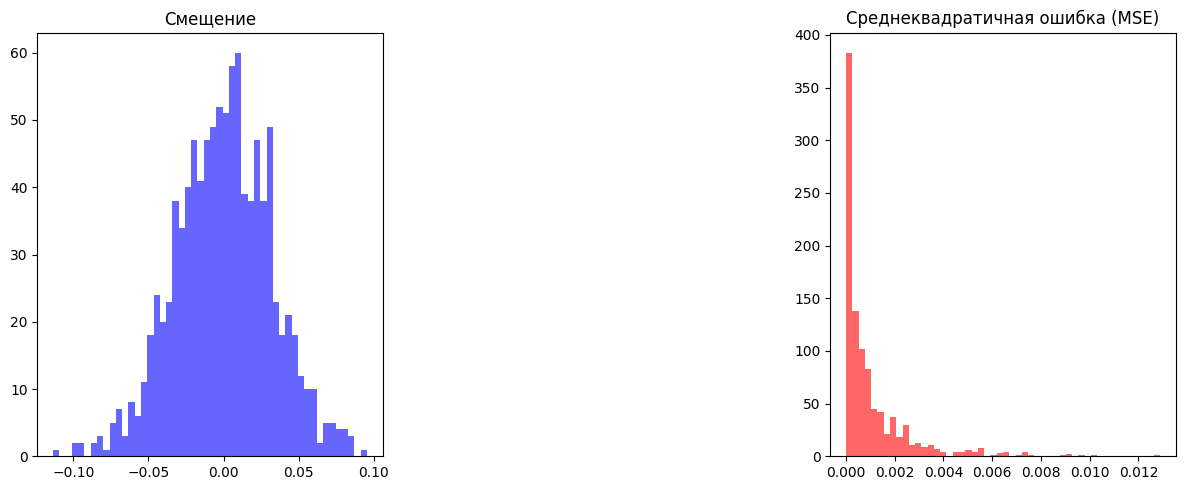

Для n = 10000
Количество отклонений: 0
Дисперсия = 0.04998885524375012


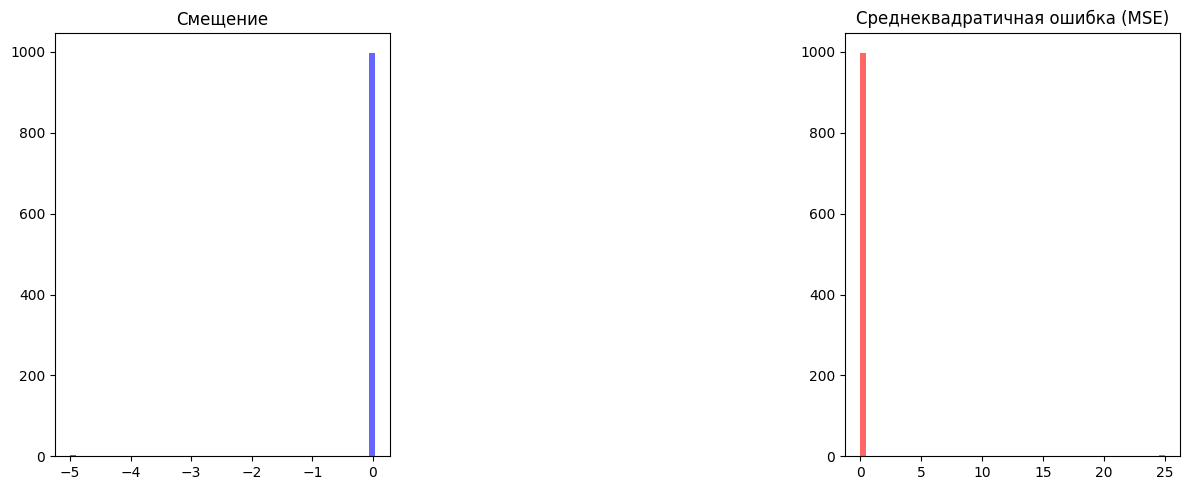

In [44]:
# Визуализация результатов
plt.figure(figsize=(12, 5))

plt.subplot(131)
plt.hist(biases, bins=50, color='b', alpha=0.6)
plt.title("Смещение")

plt.subplot(132)
plt.hist(variances, bins=50, color='g', alpha=0.6)
plt.title("Дисперсия")

plt.subplot(133)
plt.hist(mse, bins=50, color='r', alpha=0.6)
plt.title("Среднеквадратичная ошибка (MSE)")

plt.tight_layout()
plt.show()